<a href="https://colab.research.google.com/github/rajchoksi1997/CMPE257-Project/blob/main/Main_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline
from sklearn.model_selection import train_test_split

## Reading the data

In [ ]:
dataSet = pd.read_csv(r'C:\Users\alekh\Desktop\Drought.csv')

In [ ]:
print("First 5 Rows\n")
dataSet.head()

First 5 Rows



,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


In [ ]:
print("Last five rows\n")
dataSet.tail()

Last five rows



,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
19300675,56043,2016-12-27,0.16,82.88,1.63,-7.97,-13.49,-12.81,-1.39,-13.60,...,-9.41,5.90,7.63,3.61,4.02,8.58,10.39,5.92,4.47,0.0
19300676,56043,2016-12-28,0.02,83.33,1.41,-8.71,-14.10,-13.84,-2.49,-13.56,...,-10.55,6.50,11.43,4.11,7.32,9.92,14.49,7.26,7.22,NaN
19300677,56043,2016-12-29,0.00,83.75,1.59,-7.96,-13.30,-13.03,0.42,-14.51,...,-10.29,4.29,6.24,2.03,4.22,6.56,10.07,3.20,6.87,NaN
19300678,56043,2016-12-30,1.22,82.49,2.63,-2.94,-7.40,-7.33,3.76,-6.86,...,-4.14,4.98,7.34,1.99,5.35,7.28,10.12,3.24,6.89,NaN
19300679,56043,2016-12-31,0.44,82.19,1.75,-7.56,-11.98,-11.82,-0.95,-11.61,...,-10.17,2.31,3.47,0.41,3.06,3.37,5.26,0.66,4.60,NaN


In [ ]:
print("Data Show Describe")
dataSet.describe()

Data Show Describe


,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
count,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,2.756796e+06
mean,3.067038e+04,2.644145e+00,9.665578e+01,7.816178e+00,1.280146e+01,6.951072e+00,6.986916e+00,1.868141e+01,7.411665e+00,1.126974e+01,1.288900e+01,3.564013e+00,5.195993e+00,1.928879e+00,3.267113e+00,5.525151e+00,7.811798e+00,3.130077e+00,4.681721e+00,8.245298e-01
std,1.497911e+04,6.226305e+00,5.447994e+00,4.694305e+00,1.092674e+01,1.014551e+01,1.009116e+01,1.154487e+01,1.057680e+01,4.005165e+00,1.114961e+01,1.862297e+00,2.627969e+00,1.351713e+00,1.947028e+00,2.321549e+00,2.861210e+00,2.122751e+00,2.171263e+00,1.223727e+00
min,1.001000e+03,0.000000e+00,6.612000e+01,1.200000e-01,-3.734000e+01,-3.770000e+01,-3.746000e+01,-3.220000e+01,-4.596000e+01,3.000000e-02,-3.823000e+01,2.500000e-01,5.400000e-01,0.000000e+00,1.600000e-01,4.000000e-01,7.000000e-01,0.000000e+00,3.200000e-01,0.000000e+00
25%,1.904450e+04,0.000000e+00,9.584000e+01,3.780000e+00,4.450000e+00,-9.600000e-01,-9.200000e-01,1.027000e+01,-7.000000e-01,8.420000e+00,4.340000e+00,2.140000e+00,3.110000e+00,9.600000e-01,1.810000e+00,3.790000e+00,5.680000e+00,1.450000e+00,3.130000e+00,0.000000e+00
50%,2.921200e+04,1.800000e-01,9.830000e+01,6.840000e+00,1.402000e+01,7.570000e+00,7.580000e+00,2.040000e+01,8.030000e+00,1.124000e+01,1.404000e+01,3.140000e+00,4.670000e+00,1.660000e+00,2.800000e+00,5.120000e+00,7.310000e+00,2.770000e+00,4.250000e+00,0.000000e+00
75%,4.600750e+04,2.160000e+00,9.996000e+01,1.135000e+01,2.188000e+01,1.552000e+01,1.552000e+01,2.787000e+01,1.614000e+01,1.408000e+01,2.207000e+01,4.600000e+00,6.750000e+00,2.580000e+00,4.250000e+00,6.880000e+00,9.460000e+00,4.410000e+00,5.770000e+00,1.189600e+00
max,5.604300e+04,2.345900e+02,1.043200e+02,2.292000e+01,4.139000e+01,2.755000e+01,2.755000e+01,4.991000e+01,3.380000e+01,3.461000e+01,4.385000e+01,2.369000e+01,3.628000e+01,1.720000e+01,2.825000e+01,2.835000e+01,4.273000e+01,2.087000e+01,3.243000e+01,5.000000e+00


In [ ]:
print("Datatype of Attributes\n")
dataSet.info()

Datatype of Attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300680 entries, 0 to 19300679
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   fips         int64  
 1   date         object 
 2   PRECTOT      float64
 3   PS           float64
 4   QV2M         float64
 5   T2M          float64
 6   T2MDEW       float64
 7   T2MWET       float64
 8   T2M_MAX      float64
 9   T2M_MIN      float64
 10  T2M_RANGE    float64
 11  TS           float64
 12  WS10M        float64
 13  WS10M_MAX    float64
 14  WS10M_MIN    float64
 15  WS10M_RANGE  float64
 16  WS50M        float64
 17  WS50M_MAX    float64
 18  WS50M_MIN    float64
 19  WS50M_RANGE  float64
 20  score        float64
dtypes: float64(19), int64(1), object(1)
memory usage: 3.0+ GB


In [ ]:
print("Data Show Columns:\n")
dataSet.columns

Data Show Columns:



Index(['fips', 'date', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE', 'score'],
      dtype='object')

In [ ]:
print("Data Show Shape")
dataSet.shape

Data Show Shape


(19300680, 21)

In [ ]:
print("Sum of null values")
dataSet.isnull().sum()

Sum of null values


fips                  0
date                  0
PRECTOT               0
PS                    0
QV2M                  0
T2M                   0
T2MDEW                0
T2MWET                0
T2M_MAX               0
T2M_MIN               0
T2M_RANGE             0
TS                    0
WS10M                 0
WS10M_MAX             0
WS10M_MIN             0
WS10M_RANGE           0
WS50M                 0
WS50M_MAX             0
WS50M_MIN             0
WS50M_RANGE           0
score          16543884
dtype: int64

In [ ]:
print("Null values in the data\n")
dataSet.isnull().values.any()

Null values in the data



True

In [ ]:
# Drop missing values in target variable
dataSet = dataSet.dropna()
dataSet.isnull().sum()

fips           0
date           0
PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
score          0
dtype: int64

In [ ]:
print("Null values in the data\n")
dataSet.isnull().values.any()

Null values in the data



False

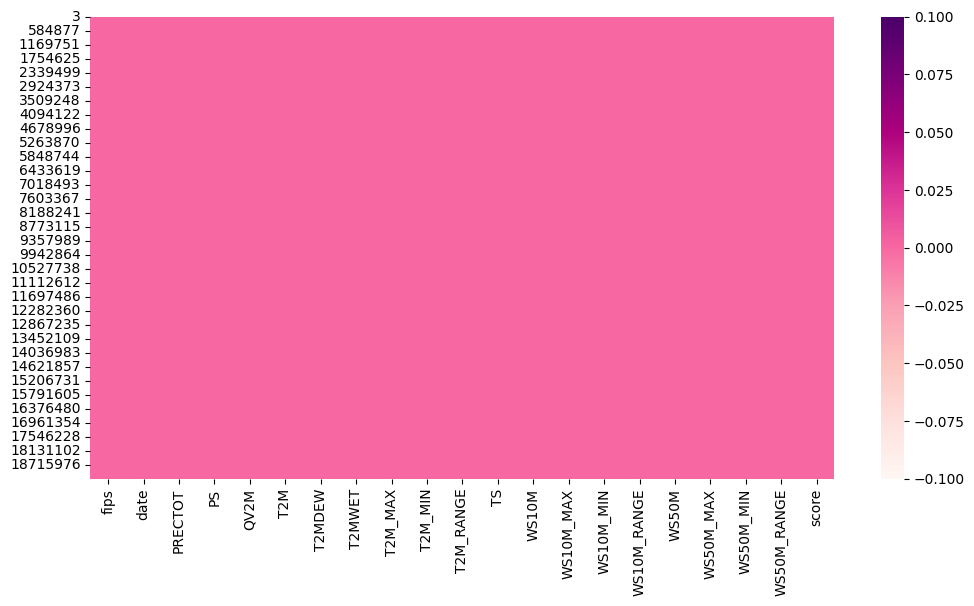

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(dataSet.isnull(),cmap='RdPu')
plt.show()

In [ ]:
column_list = list(dataSet.columns)
column_list

['fips',
 'date',
 'PRECTOT',
 'PS',
 'QV2M',
 'T2M',
 'T2MDEW',
 'T2MWET',
 'T2M_MAX',
 'T2M_MIN',
 'T2M_RANGE',
 'TS',
 'WS10M',
 'WS10M_MAX',
 'WS10M_MIN',
 'WS10M_RANGE',
 'WS50M',
 'WS50M_MAX',
 'WS50M_MIN',
 'WS50M_RANGE',
 'score']

In [ ]:
# Number of unique values in each of the columns.
dataSet.nunique()

fips            3108
date             887
PRECTOT         6737
PS              3636
QV2M            2165
T2M             6606
T2MDEW          5582
T2MWET          5530
T2M_MAX         6905
T2M_MIN         6557
T2M_RANGE       2787
TS              6928
WS10M           1513
WS10M_MAX       1877
WS10M_MIN       1276
WS10M_RANGE     1592
WS50M           1854
WS50M_MAX       2286
WS50M_MIN       1572
WS50M_RANGE     1935
score          55395
dtype: int64

In [ ]:
date = dataSet['date']
date.head()

3     2000-01-04
10    2000-01-11
17    2000-01-18
24    2000-01-25
31    2000-02-01
Name: date, dtype: object

In [ ]:
# Extract year, day and month into new columns
dataSet['year'] = pd.DatetimeIndex(date).year
dataSet['month'] = pd.DatetimeIndex(date).month
dataSet['day'] = pd.DatetimeIndex(date).day
dataSet.dtypes

fips             int64
date            object
PRECTOT        float64
PS             float64
QV2M           float64
T2M            float64
T2MDEW         float64
T2MWET         float64
T2M_MAX        float64
T2M_MIN        float64
T2M_RANGE      float64
TS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WS50M          float64
WS50M_MAX      float64
WS50M_MIN      float64
WS50M_RANGE    float64
score          float64
year             int64
month            int64
day              int64
dtype: object

In [ ]:
dataSet['score'].value_counts()

0.0000    1480827
1.0000     219135
2.0000     123789
3.0000      82801
4.0000      45841
           ...   
0.1145          1
2.0172          1
0.6750          1
1.3998          1
0.6060          1
Name: score, Length: 55395, dtype: int64

In [ ]:
# Binning target variable into 6classes
dataSet['score'] = dataSet['score'].round().astype(int)

In [ ]:
dataSet['score'].value_counts()

0    1652230
1     466944
2     295331
3     196802
4     106265
5      39224
Name: score, dtype: int64

In [ ]:
dataSet.describe(include=['object'])

,date
count,2756796
unique,887
top,2000-01-04
freq,3108


In [ ]:
# Removing special characters from continuous features
for c in ['fips', 'date', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE', 'score']:
    unique_val_cols = dataSet[c].unique()
    print ('Unique values in ' , c , 'are ', unique_val_cols)

Unique values in  fips are  [ 1001  1003  1005 ... 56039 56041 56043]
Unique values in  date are  ['2000-01-04' '2000-01-11' '2000-01-18' '2000-01-25' '2000-02-01'
 '2000-02-08' '2000-02-15' '2000-02-22' '2000-02-29' '2000-03-07'
 '2000-03-14' '2000-03-21' '2000-03-28' '2000-04-04' '2000-04-11'
 '2000-04-18' '2000-04-25' '2000-05-02' '2000-05-09' '2000-05-16'
 '2000-05-23' '2000-05-30' '2000-06-06' '2000-06-13' '2000-06-20'
 '2000-06-27' '2000-07-04' '2000-07-11' '2000-07-18' '2000-07-25'
 '2000-08-01' '2000-08-08' '2000-08-15' '2000-08-22' '2000-08-29'
 '2000-09-05' '2000-09-12' '2000-09-19' '2000-09-26' '2000-10-03'
 '2000-10-10' '2000-10-17' '2000-10-24' '2000-10-31' '2000-11-07'
 '2000-11-14' '2000-11-21' '2000-11-28' '2000-12-05' '2000-12-12'
 '2000-12-19' '2000-12-26' '2001-01-02' '2001-01-09' '2001-01-16'
 '2001-01-23' '2001-01-30' '2001-02-06' '2001-02-13' '2001-02-20'
 '2001-02-27' '2001-03-06' '2001-03-13' '2001-03-20' '2001-03-27'
 '2001-04-03' '2001-04-10' '2001-04-17' '200

Unique values in  PS are  [100.29 100.4  100.39 ... 103.65 103.75 103.76]
Unique values in  QV2M are  [ 6.42  6.63  9.53 ... 21.54 21.64 21.44]
Unique values in  T2M are  [ 11.4   11.48  14.28 ... -29.26 -28.93 -26.79]
Unique values in  T2MDEW are  [  6.09   7.84  13.26 ... -29.93 -30.28 -29.54]
Unique values in  T2MWET are  [  6.1    7.84  13.26 ... -29.91 -29.41 -27.54]
Unique values in  T2M_MAX are  [ 18.09  18.88  18.04 ... -20.12 -24.42 -19.53]
Unique values in  T2M_MIN are  [  2.16   5.72   8.98 ... -34.78 -35.15 -35.38]
Unique values in  T2M_RANGE are  [15.92 13.16  9.06 ... 25.4  28.57 28.55]
Unique values in  TS are  [ 11.31  10.43  14.19 ... -26.42 -30.38 -28.05]
Unique values in  WS10M are  [ 3.84  1.76  2.63 ... 13.75 16.06 14.72]
Unique values in  WS10M_MAX are  [ 5.67  2.48  3.6  ... 19.18 19.94 18.13]
Unique values in  WS10M_MIN are  [ 2.08  1.05  1.67 ... 11.64 12.41 12.53]
Unique values in  WS10M_RANGE are  [ 3.59  1.43  1.92 ... 17.21 17.09 16.89]
Unique values in  WS

In [ ]:
for c in ['fips', 'date', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE', 'score']:
    dataSet[c] = pd.to_numeric(dataSet[c], errors='coerce')

In [ ]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2756796 entries, 3 to 19300675
Data columns (total 24 columns):
 #   Column       Dtype  
---  ------       -----  
 0   fips         int64  
 1   date         float64
 2   PRECTOT      float64
 3   PS           float64
 4   QV2M         float64
 5   T2M          float64
 6   T2MDEW       float64
 7   T2MWET       float64
 8   T2M_MAX      float64
 9   T2M_MIN      float64
 10  T2M_RANGE    float64
 11  TS           float64
 12  WS10M        float64
 13  WS10M_MAX    float64
 14  WS10M_MIN    float64
 15  WS10M_RANGE  float64
 16  WS50M        float64
 17  WS50M_MAX    float64
 18  WS50M_MIN    float64
 19  WS50M_RANGE  float64
 20  score        int32  
 21  year         int64  
 22  month        int64  
 23  day          int64  
dtypes: float64(19), int32(1), int64(4)
memory usage: 515.3 MB


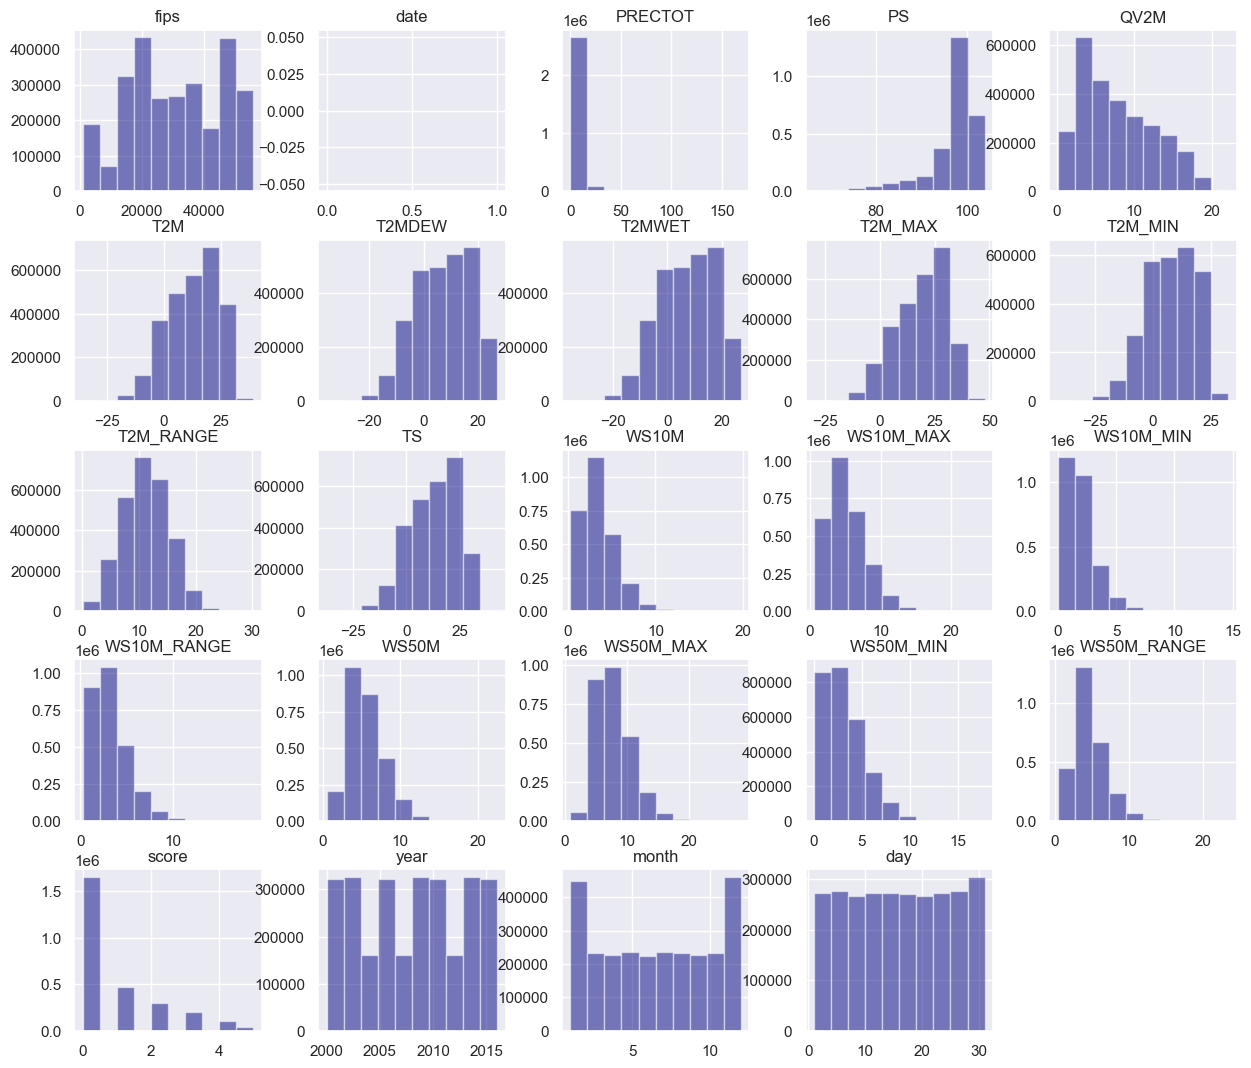

In [ ]:
sns.set(style="darkgrid")
dataSet.hist(bins=10,figsize=(15,13) ,color = 'navy', alpha = 0.5)
plt.show()

## The Drought dataset is a labelled dataset. Distribution of scores is analyzed to identify if data is biased or not.
## It can be seen that the features PRICTOT ,WS10M-MIN,WS50M-MIN,WS10M-RANGE are skewed to the left.
## The features PS,T2M,T2M-MAX are skewed to the right while remaining features are fairly well distributed across all range.

# Exploratory Data Analysis

## Univariate Analysis on Descriptive Statistics

In [ ]:
# For numeric 
dataSet.describe()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,year,month,day
count,2.756796e+06,0.0,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,...,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06
mean,3.067038e+04,NaN,2.714566e+00,9.664736e+01,7.875770e+00,1.289923e+01,7.049350e+00,7.084938e+00,1.876711e+01,7.519916e+00,...,1.920655e+00,3.282268e+00,5.532799e+00,7.828799e+00,3.121578e+00,4.707223e+00,8.231266e-01,2.007999e+03,6.520857e+00,1.568997e+01
std,1.497911e+04,NaN,6.247590e+00,5.444698e+00,4.721459e+00,1.097040e+01,1.019765e+01,1.014364e+01,1.160295e+01,1.061818e+01,...,1.342458e+00,1.943136e+00,2.298550e+00,2.836618e+00,2.109945e+00,2.181020e+00,1.239070e+00,4.897714e+00,3.447033e+00,8.798878e+00
min,1.001000e+03,NaN,0.000000e+00,6.649000e+01,1.400000e-01,-3.544000e+01,-3.544000e+01,-3.546000e+01,-3.003000e+01,-4.085000e+01,...,0.000000e+00,2.600000e-01,5.100000e-01,8.500000e-01,0.000000e+00,4.200000e-01,0.000000e+00,2.000000e+03,1.000000e+00,1.000000e+00
25%,1.904450e+04,NaN,0.000000e+00,9.583000e+01,3.810000e+00,4.580000e+00,-8.800000e-01,-8.400000e-01,1.036000e+01,-5.700000e-01,...,9.600000e-01,1.820000e+00,3.820000e+00,5.700000e+00,1.450000e+00,3.140000e+00,0.000000e+00,2.004000e+03,4.000000e+00,8.000000e+00
50%,2.921200e+04,NaN,1.900000e-01,9.828000e+01,6.940000e+00,1.421000e+01,7.810000e+00,7.810000e+00,2.062000e+01,8.260000e+00,...,1.660000e+00,2.820000e+00,5.150000e+00,7.350000e+00,2.770000e+00,4.270000e+00,0.000000e+00,2.008000e+03,7.000000e+00,1.600000e+01
75%,4.600750e+04,NaN,2.260000e+00,9.994000e+01,1.145000e+01,2.200000e+01,1.567000e+01,1.567000e+01,2.797000e+01,1.628000e+01,...,2.570000e+00,4.280000e+00,6.880000e+00,9.490000e+00,4.390000e+00,5.810000e+00,1.000000e+00,2.012000e+03,1.000000e+01,2.300000e+01
max,5.604300e+04,NaN,1.686900e+02,1.037600e+02,2.212000e+01,3.933000e+01,2.687000e+01,2.687000e+01,4.775000e+01,3.228000e+01,...,1.462000e+01,1.872000e+01,2.247000e+01,2.833000e+01,1.778000e+01,2.337000e+01,5.000000e+00,2.016000e+03,1.200000e+01,3.100000e+01


In [ ]:
# For categorical
dataSet[["year","month","day"]].describe()

,year,month,day
count,2.756796e+06,2.756796e+06,2.756796e+06
mean,2.007999e+03,6.520857e+00,1.568997e+01
std,4.897714e+00,3.447033e+00,8.798878e+00
min,2.000000e+03,1.000000e+00,1.000000e+00
25%,2.004000e+03,4.000000e+00,8.000000e+00
50%,2.008000e+03,7.000000e+00,1.600000e+01
75%,2.012000e+03,1.000000e+01,2.300000e+01
max,2.016000e+03,1.200000e+01,3.100000e+01


In [ ]:
print("Skewness")
dataSet.skew(axis = 0, skipna = True)

Skewness


fips          -0.077367
date                NaN
PRECTOT        4.568803
PS            -2.132573
QV2M           0.526605
T2M           -0.426059
T2MDEW        -0.302684
T2MWET        -0.289061
T2M_MAX       -0.467449
T2M_MIN       -0.365648
T2M_RANGE      0.092413
TS            -0.396537
WS10M          1.112524
WS10M_MAX      0.931888
WS10M_MIN      1.400951
WS10M_RANGE    1.287969
WS50M          0.861690
WS50M_MAX      0.899830
WS50M_MIN      0.860444
WS50M_RANGE    1.214403
score          1.498394
year          -0.000183
month         -0.008198
day            0.006969
dtype: float64

In [ ]:
print("Kurtosis")
dataSet.kurtosis(axis = 0, skipna = True)

Kurtosis


fips           -1.100136
date                 NaN
PRECTOT        33.304567
PS              4.813301
QV2M           -0.786067
T2M            -0.554336
T2MDEW         -0.733896
T2MWET         -0.758504
T2M_MAX        -0.508101
T2M_MIN        -0.446940
T2M_RANGE      -0.316984
TS             -0.535722
WS10M           1.419724
WS10M_MAX       0.705953
WS10M_MIN       3.159288
WS10M_RANGE     2.084432
WS50M           0.819908
WS50M_MAX       0.988590
WS50M_MIN       0.596612
WS50M_RANGE     2.205205
score           1.387056
year           -1.208783
month          -1.207511
day            -1.194293
dtype: float64

# Exploratory Data Analysis

## Univariate Analysis on Distribution of continuous variables

In [ ]:
list_of_columns = ['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE']
measures_df = dataSet[['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE']]

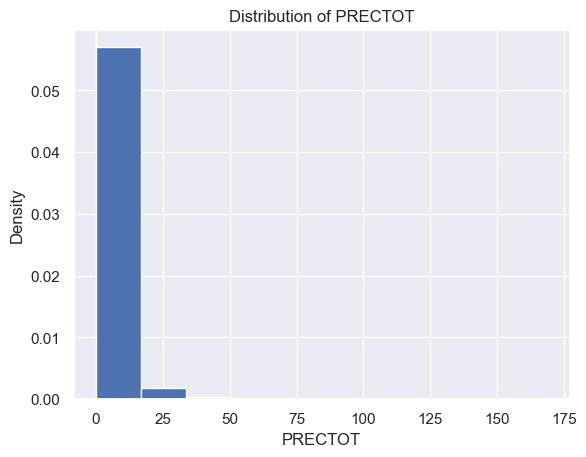

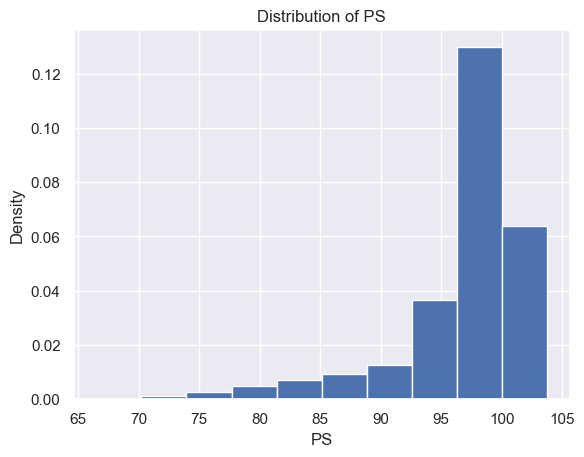

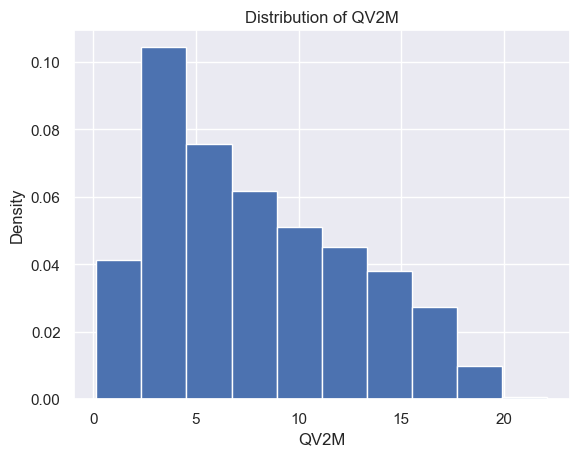

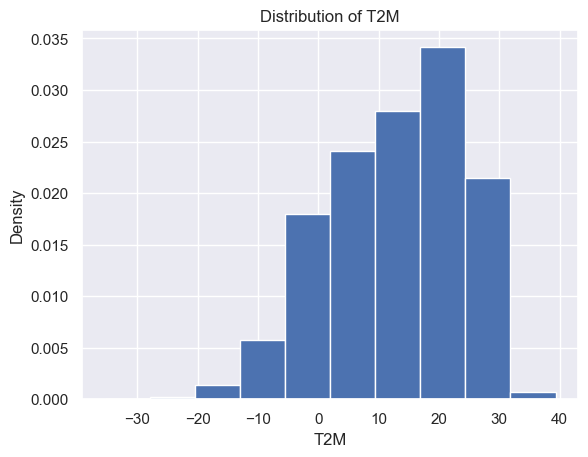

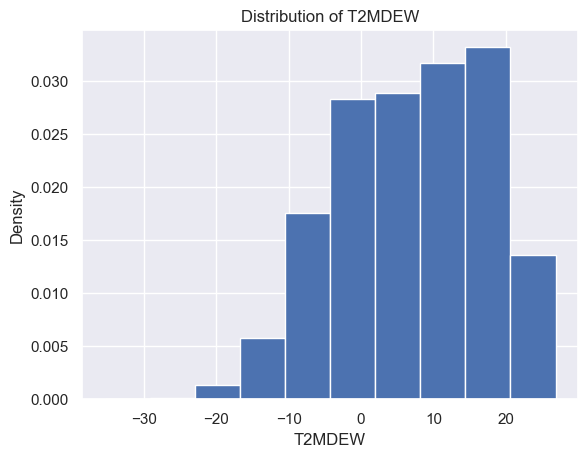

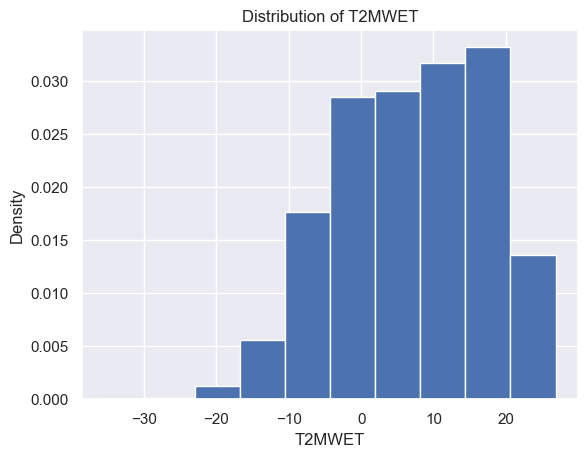

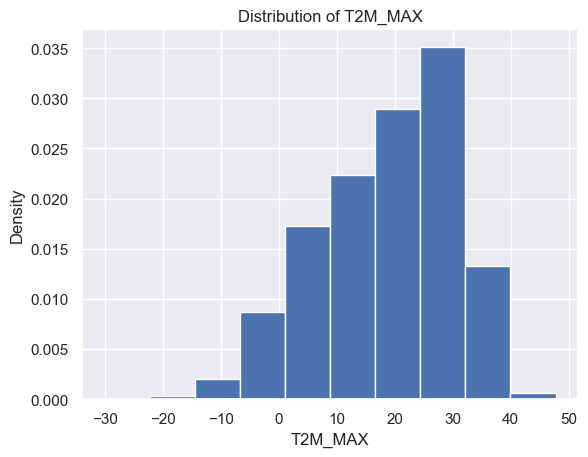

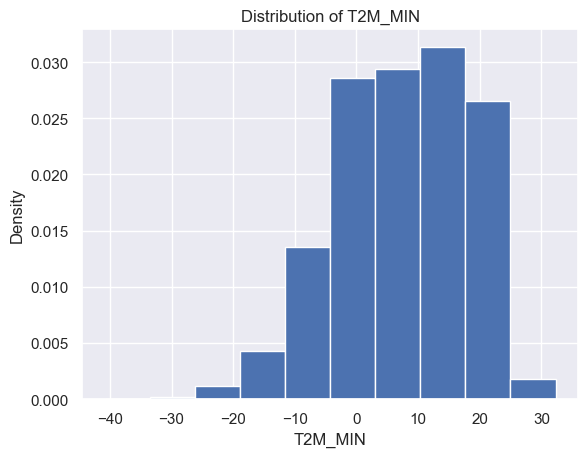

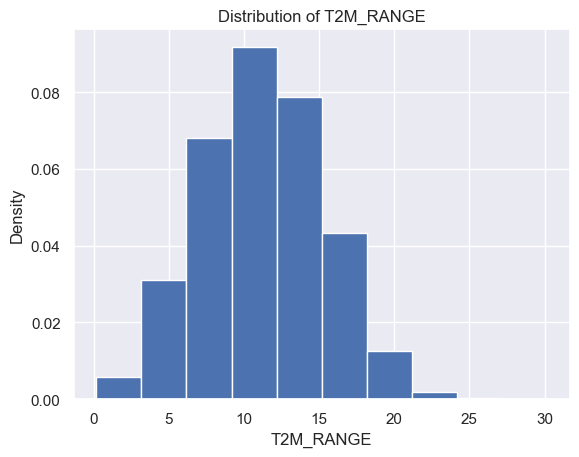

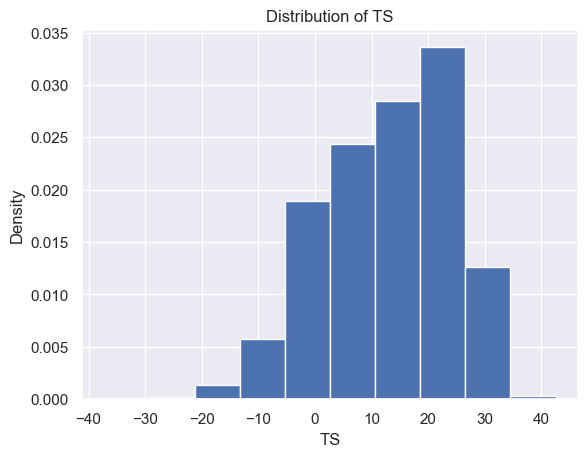

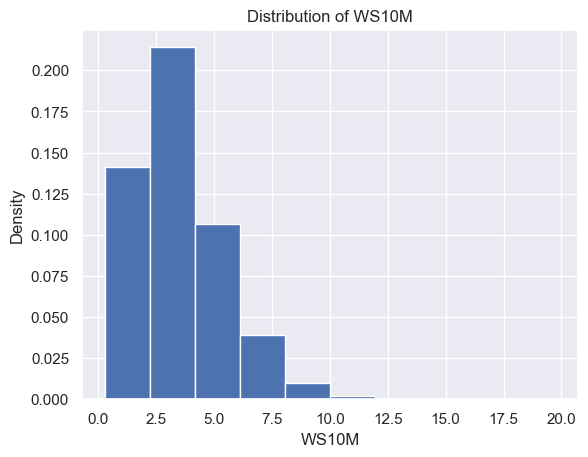

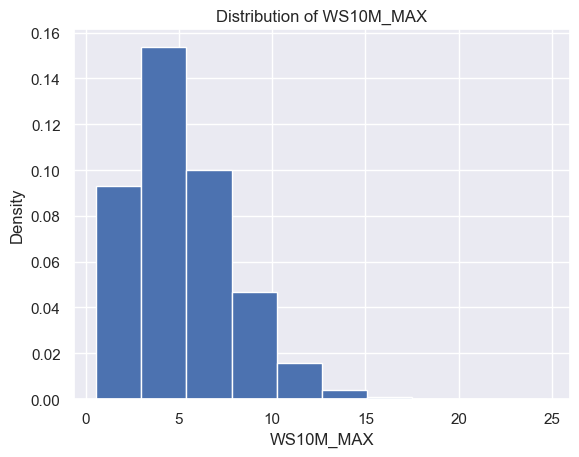

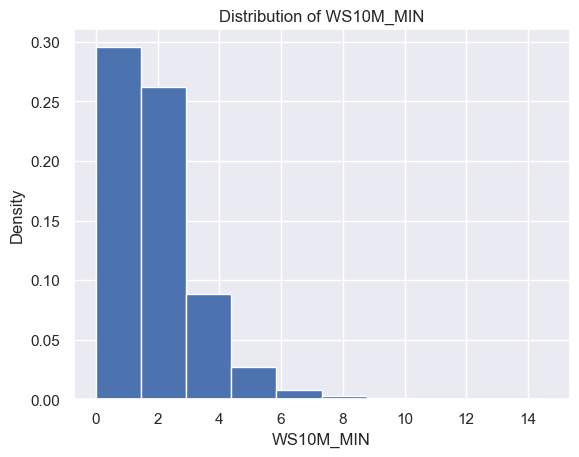

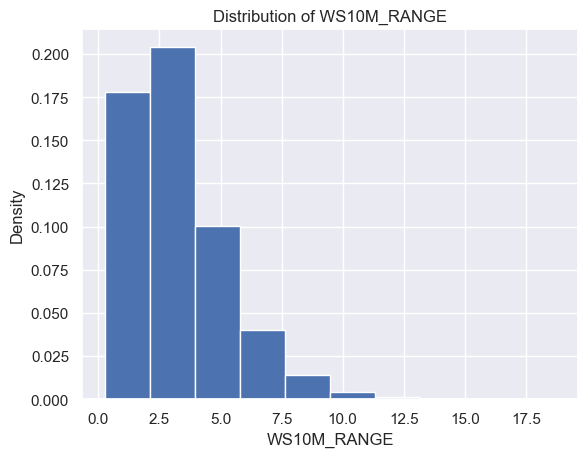

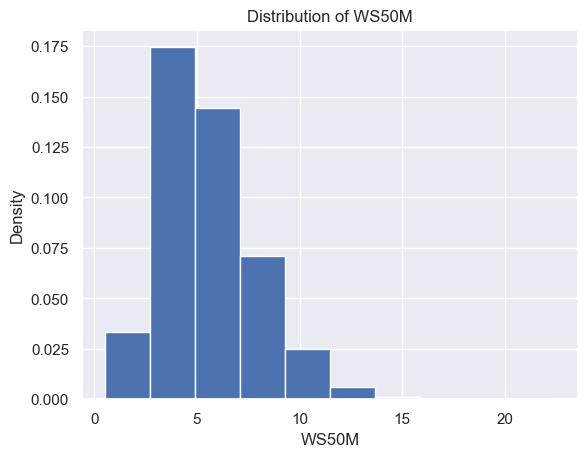

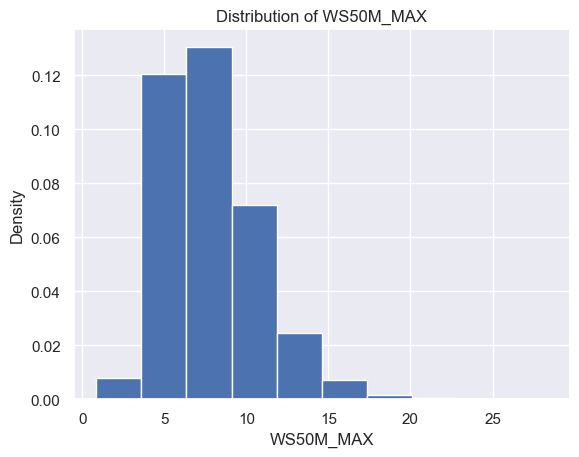

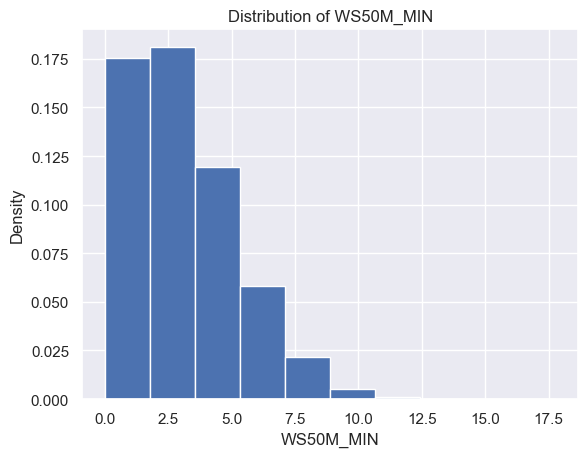

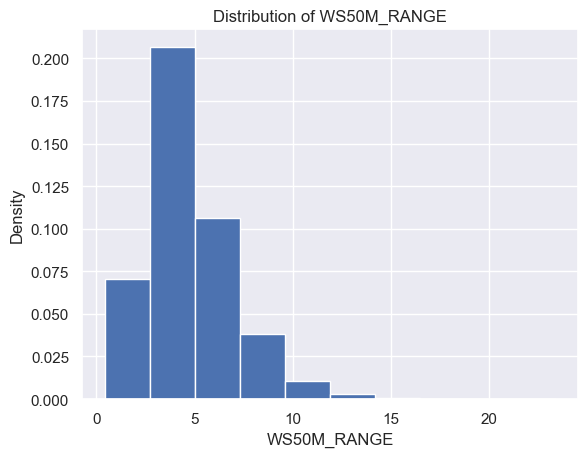

In [ ]:
for col in list_of_columns:
    plt.figure()
    plt.hist(dataSet[col], density = True)
    x = col
    plt.xlabel(x)
    y = 'Density'
    plt.ylabel(y)
    plt.title('Distribution of {xLabel}'.format(xLabel=x))

# Univariate Analysis on distribution of categorical variables

In [ ]:
categorical_columns = ['score','year','month','day']
categorical_data = dataSet[['score','year','month','day']]

<Figure size 1000x4000 with 0 Axes>

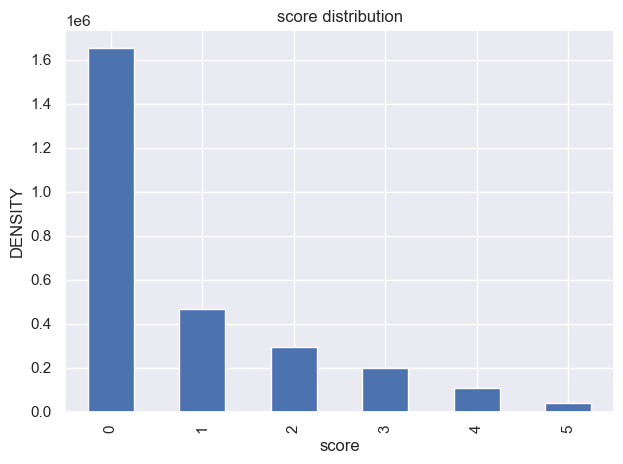

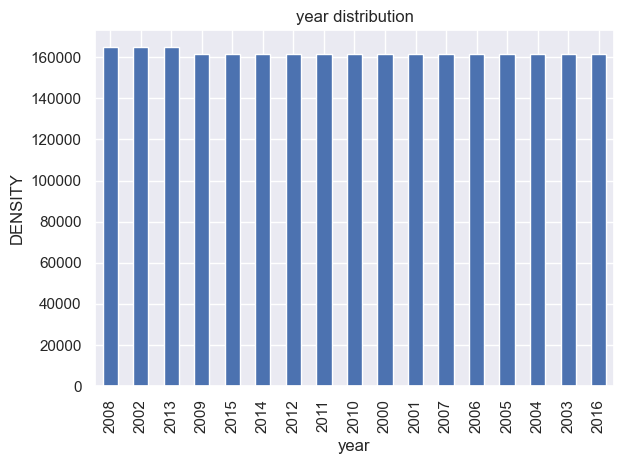

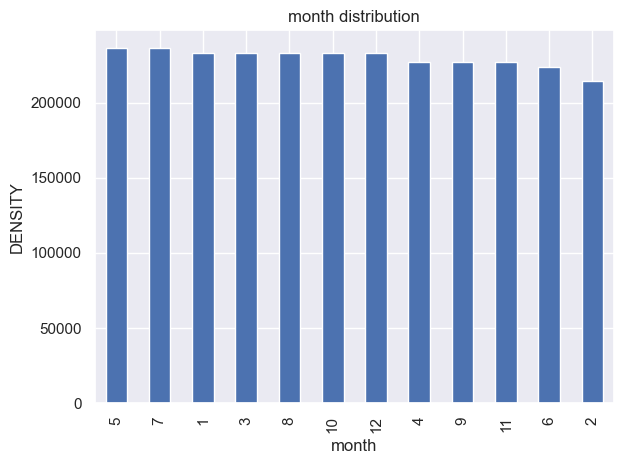

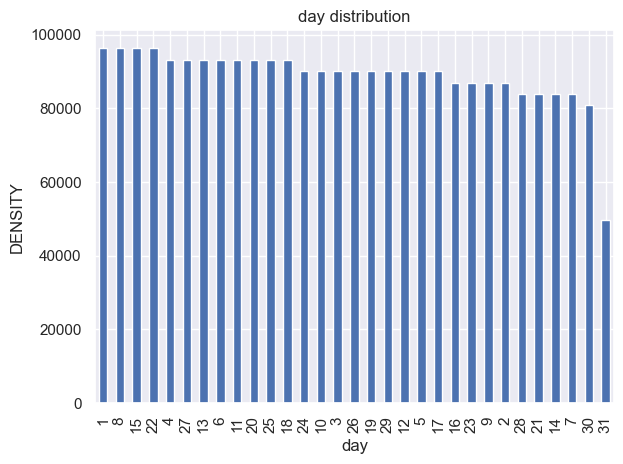

In [ ]:
#categorical variables
plt.figure(figsize=(10,40))
for col in categorical_columns:
    plt.figure()
    categorical_data[col].value_counts().plot(kind = 'bar')
    x_label = col
    y_label = 'DENSITY'
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title('{x_name} distribution'.format(x_name=x_label))
    plt.tight_layout()

# Bivariate analysis on categorical variables

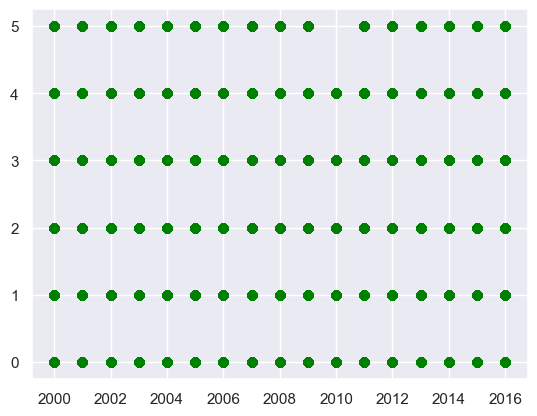

In [ ]:
plt.scatter(dataSet['year'], dataSet['score'], c ="green")
plt.show()

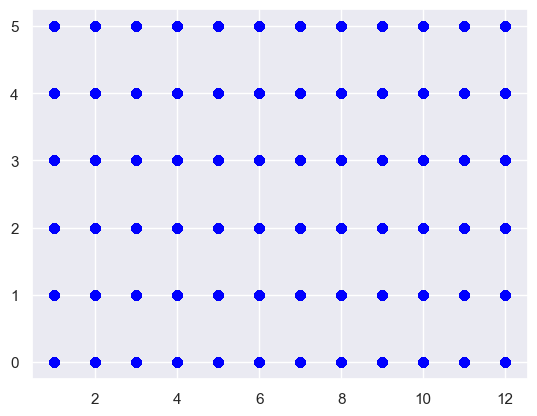

In [ ]:
plt.scatter(dataSet['month'], dataSet['score'], c ="blue")
plt.show()

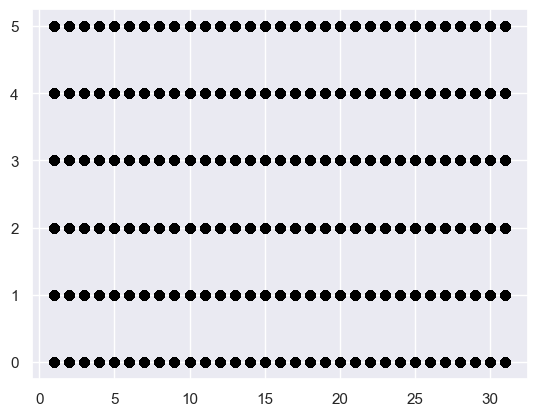

In [ ]:
plt.scatter(dataSet['day'], dataSet['score'], c ="black")
plt.show()

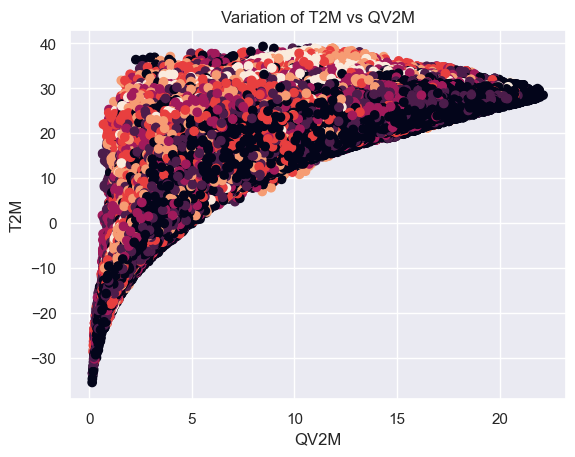

In [ ]:
plt.scatter(dataSet['QV2M'], dataSet['T2M'], c =dataSet['score'])
plt.xlabel('QV2M')
plt.ylabel('T2M')
plt.title('Variation of T2M vs QV2M')
plt.show()

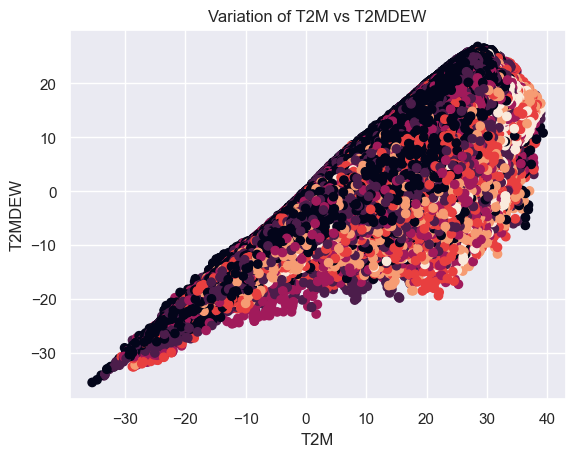

In [ ]:
plt.scatter(dataSet['T2M'], dataSet['T2MDEW'], c =dataSet['score'])
plt.xlabel('T2M')
plt.ylabel('T2MDEW')
plt.title('Variation of T2M vs T2MDEW')
plt.show()

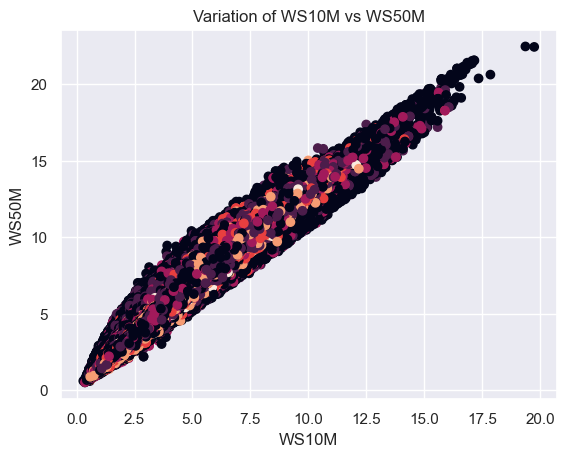

In [ ]:
temp_dataSet = dataSet[dataSet['score']==5]
plt.scatter(dataSet['WS10M'], dataSet['WS50M'], c= dataSet['score'])
plt.xlabel('WS10M')
plt.ylabel('WS50M')
plt.title('Variation of WS10M vs WS50M')
plt.show()

# To understand the correlations between features scatter plots were drawn to find out the attributes having strong correlation.

# In the above scatter plots we can observe that the independent variables have shown strong positive correlation.

# The pairs WS10M - WS50M have the one-to-one relationship.

# The features T2M – T2MDEW and QV2M - T2M relationship is not inear, although we can say that the overall they have strong correlation.

# Stripping target values from dataset

In [ ]:
independent_variables = dataSet.drop('score', 1)
independent_variables = independent_variables.drop('date', 1)
independent_variables = independent_variables.drop('fips', 1)

C:\Users\alekh\AppData\Local\Temp\ipykernel_29768\3908393330.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  independent_variables = dataSet.drop('score', 1)
C:\Users\alekh\AppData\Local\Temp\ipykernel_29768\3908393330.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  independent_variables = independent_variables.drop('date', 1)
C:\Users\alekh\AppData\Local\Temp\ipykernel_29768\3908393330.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  independent_variables = independent_variables.drop('fips', 1)


In [ ]:
independent_variables.head()

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,...,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,year,month,day
3,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,11.31,...,5.67,2.08,3.59,6.73,9.31,3.74,5.58,2000,1,4
10,1.33,100.40,6.63,11.48,7.84,7.84,18.88,5.72,13.16,10.43,...,2.48,1.05,1.43,3.55,6.38,1.71,4.67,2000,1,11
17,1.11,100.39,9.53,14.28,13.26,13.26,18.04,8.98,9.06,14.19,...,3.60,1.67,1.92,5.19,6.40,3.84,2.55,2000,1,18
24,0.00,100.11,2.05,-0.78,-7.93,-7.72,5.65,-5.46,11.11,-0.61,...,4.59,2.28,2.32,5.75,8.03,3.96,4.07,2000,1,25
31,0.00,101.00,3.36,2.06,-1.73,-1.70,11.02,-4.21,15.23,1.88,...,2.74,0.88,1.86,4.18,6.38,1.27,5.11,2000,2,1


In [ ]:
target = dataSet['score']
target.head()

3     1
10    2
17    2
24    2
31    1
Name: score, dtype: int32

# Identifying the outliers

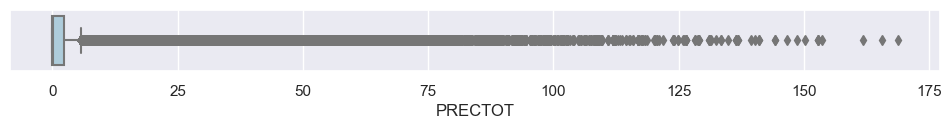

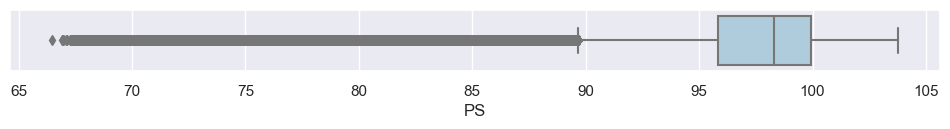

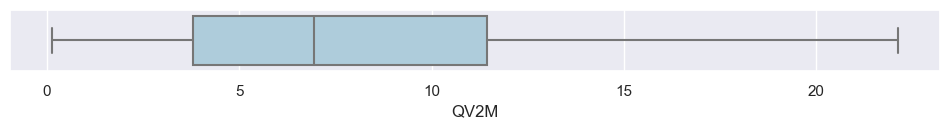

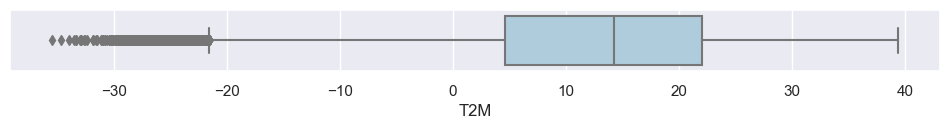

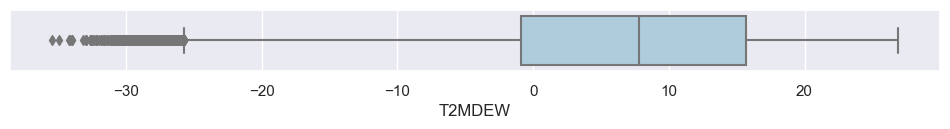

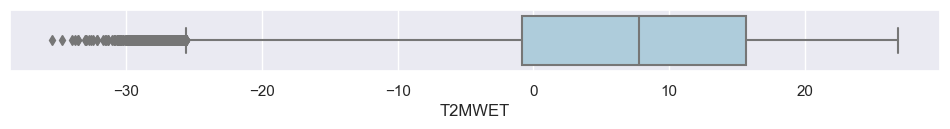

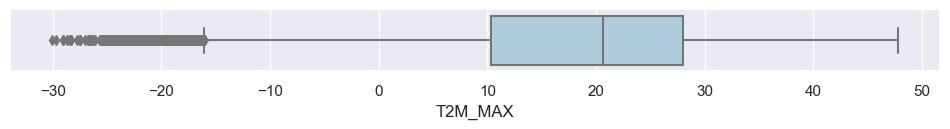

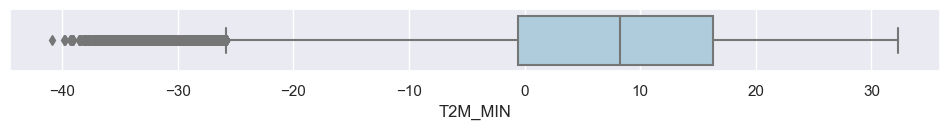

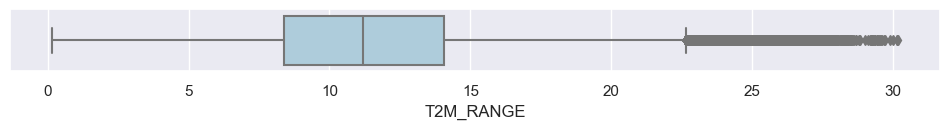

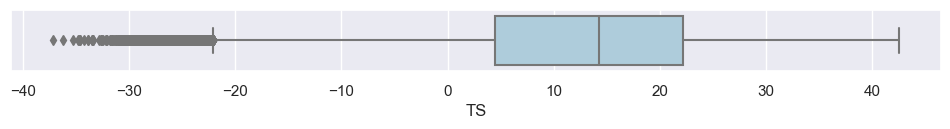

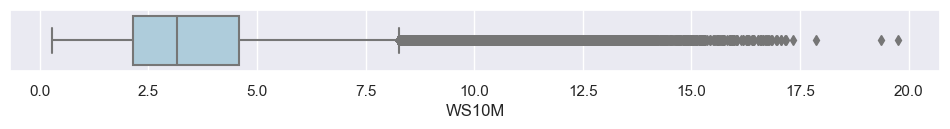

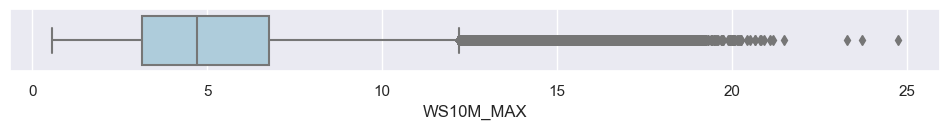

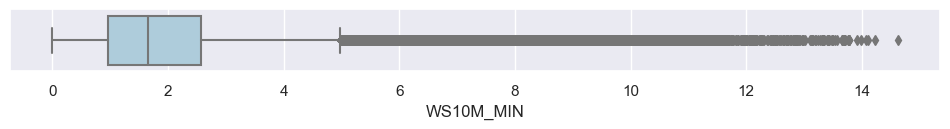

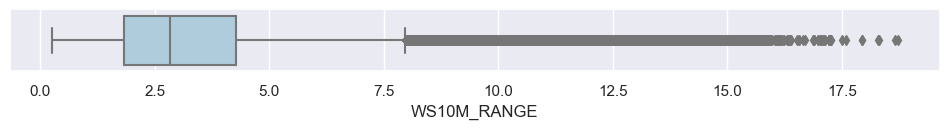

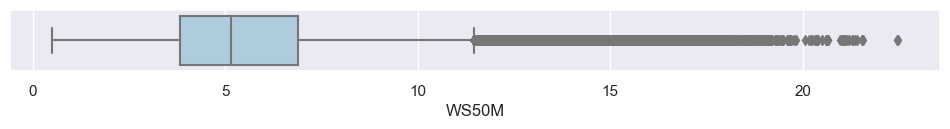

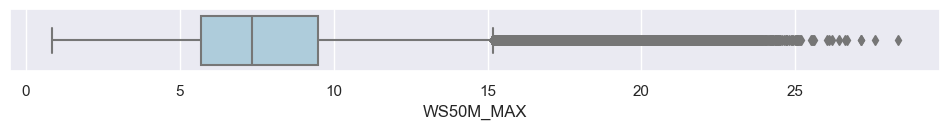

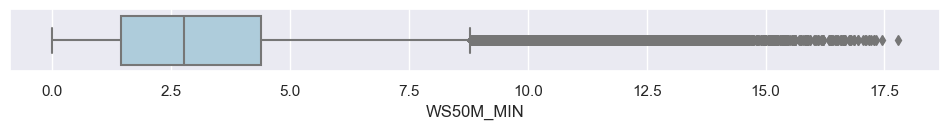

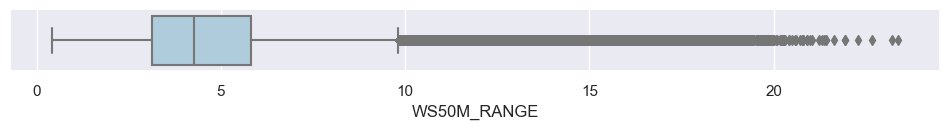

In [ ]:
dataSet=dataSet[['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M'
                                  ,'WS50M_MAX','WS50M_MIN','WS50M_RANGE']]
for column in dataSet:
        plt.figure(figsize=(12,0.8))
        sns.boxplot(data=dataSet, x=column,palette="Paired")

In [ ]:
print('Total rows:')
len(measures_df.index)

Total rows:


2756796

In [ ]:
for i in measures_df.select_dtypes(exclude = ['object']).columns:
    print ('# of values beyond outlier value limit in ', i)
    print(len(measures_df[(measures_df[i] > measures_df[i].mean() + 3*measures_df[i].std()) | (measures_df[i] < measures_df[i].mean() - 3*measures_df[i].std())]))

# of values beyond outlier value limit in  PRECTOT
65933
# of values beyond outlier value limit in  PS
73197
# of values beyond outlier value limit in  QV2M
1
# of values beyond outlier value limit in  T2M
4531
# of values beyond outlier value limit in  T2MDEW
2023
# of values beyond outlier value limit in  T2MWET
1814
# of values beyond outlier value limit in  T2M_MAX
3384
# of values beyond outlier value limit in  T2M_MIN
6944
# of values beyond outlier value limit in  T2M_RANGE
3628
# of values beyond outlier value limit in  TS
4762
# of values beyond outlier value limit in  WS10M
29954
# of values beyond outlier value limit in  WS10M_MAX
23387
# of values beyond outlier value limit in  WS10M_MIN
39901
# of values beyond outlier value limit in  WS10M_RANGE
35979
# of values beyond outlier value limit in  WS50M
23090
# of values beyond outlier value limit in  WS50M_MAX
25985
# of values beyond outlier value limit in  WS50M_MIN
19569
# of values beyond outlier value limit in  WS50M_RA

# Deleting the values which are beyond the outlier value limit

In [ ]:
dataSet = dataSet[(dataSet['PRECTOT'] <= dataSet['PRECTOT'].mean() + 3*dataSet['PRECTOT'].std()) &
        (dataSet['PRECTOT'] >= dataSet['PRECTOT'].mean() - 3*dataSet['PRECTOT'].std())]

In [ ]:
dataSet = dataSet[(dataSet['PS'] <= dataSet['PS'].mean() + 3*dataSet['PS'].std()) &
        (dataSet['PS'] >= dataSet['PS'].mean() - 3*dataSet['PS'].std())]

In [ ]:
dataSet = dataSet[(dataSet['QV2M'] <= dataSet['QV2M'].mean() + 3*dataSet['QV2M'].std()) &
        (dataSet['QV2M'] >= dataSet['QV2M'].mean() - 3*dataSet['QV2M'].std())]

In [ ]:
dataSet = dataSet[(dataSet['T2M'] <= dataSet['T2M'].mean() + 3*dataSet['T2M'].std()) &
        (dataSet['T2M'] >= dataSet['T2M'].mean() - 3*dataSet['T2M'].std())]

In [ ]:
dataSet = dataSet[(dataSet['T2MDEW'] <= dataSet['T2MDEW'].mean() + 3*dataSet['T2MDEW'].std()) &
        (dataSet['T2MDEW'] >= dataSet['T2MDEW'].mean() - 3*dataSet['T2MDEW'].std())]

In [ ]:
dataSet = dataSet[(dataSet['T2MWET'] <= dataSet['T2MWET'].mean() + 3*dataSet['T2MWET'].std()) &
        (dataSet['T2MWET'] >= dataSet['T2MWET'].mean() - 3*dataSet['T2MWET'].std())]

In [ ]:
dataSet = dataSet[(dataSet['T2M_MAX'] <= dataSet['T2M_MAX'].mean() + 3*dataSet['T2M_MAX'].std()) &
        (dataSet['T2M_MAX'] >= dataSet['T2M_MAX'].mean() - 3*dataSet['T2M_MAX'].std())]

In [ ]:
dataSet = dataSet[(dataSet['T2M_MIN'] <= dataSet['T2M_MIN'].mean() + 3*dataSet['T2M_MIN'].std()) &
        (dataSet['T2M_MIN'] >= dataSet['T2M_MIN'].mean() - 3*dataSet['T2M_MIN'].std())]

In [ ]:
dataSet = dataSet[(dataSet['T2M_RANGE'] <= dataSet['T2M_RANGE'].mean() + 3*dataSet['T2M_RANGE'].std()) &
        (dataSet['T2M_RANGE'] >= dataSet['T2M_RANGE'].mean() - 3*dataSet['T2M_RANGE'].std())]

In [ ]:
dataSet = dataSet[(dataSet['TS'] <= dataSet['TS'].mean() + 3*dataSet['TS'].std()) &
        (dataSet['TS'] >= dataSet['TS'].mean() - 3*dataSet['TS'].std())]

In [ ]:
dataSet = dataSet[(dataSet['WS10M'] <= dataSet['WS10M'].mean() + 3*dataSet['WS10M'].std()) &
        (dataSet['WS10M'] >= dataSet['WS10M'].mean() - 3*dataSet['WS10M'].std())]

In [ ]:
dataSet = dataSet[(dataSet['WS10M_MAX'] <= dataSet['WS10M_MAX'].mean() + 3*dataSet['WS10M_MAX'].std()) &
        (dataSet['WS10M_MAX'] >= dataSet['WS10M_MAX'].mean() - 3*dataSet['WS10M_MAX'].std())]

In [ ]:
dataSet = dataSet[(dataSet['WS10M_MIN'] <= dataSet['WS10M_MIN'].mean() + 3*dataSet['WS10M_MIN'].std()) &
        (dataSet['WS10M_MIN'] >= dataSet['WS10M_MIN'].mean() - 3*dataSet['WS10M_MIN'].std())]

In [ ]:
dataSet = dataSet[(dataSet['WS10M_RANGE'] <= dataSet['WS10M_RANGE'].mean() + 3*dataSet['WS10M_RANGE'].std()) &
        (dataSet['WS10M_RANGE'] >= dataSet['WS10M_RANGE'].mean() - 3*dataSet['WS10M_RANGE'].std())]

In [ ]:
dataSet = dataSet[(dataSet['WS50M'] <= dataSet['WS50M'].mean() + 3*dataSet['WS50M'].std()) &
        (dataSet['WS50M'] >= dataSet['WS50M'].mean() - 3*dataSet['WS50M'].std())]

In [ ]:
dataSet = dataSet[(dataSet['WS50M_MAX'] <= dataSet['WS50M_MAX'].mean() + 3*dataSet['WS50M_MAX'].std()) &
        (dataSet['WS50M_MAX'] >= dataSet['WS50M_MAX'].mean() - 3*dataSet['WS50M_MAX'].std())]

In [ ]:
dataSet = dataSet[(dataSet['WS50M_MIN'] <= dataSet['WS50M_MIN'].mean() + 3*dataSet['WS50M_MIN'].std()) &
        (dataSet['WS50M_MIN'] >= dataSet['WS50M_MIN'].mean() - 3*dataSet['WS50M_MIN'].std())]

In [ ]:
dataSet = dataSet[(dataSet['WS50M_RANGE'] <= dataSet['WS50M_RANGE'].mean() + 3*dataSet['WS50M_RANGE'].std()) &
        (dataSet['WS50M_RANGE'] >= dataSet['WS50M_RANGE'].mean() - 3*dataSet['WS50M_RANGE'].std())]

In [ ]:
print('Total rows:')
len(dataSet.index)

Total rows:


2474338

# Correlation between features

In [ ]:
correlation_plot = measures_df.corr()
correlation_plot.style.background_gradient(cmap = 'YlGnBu')

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
PRECTOT,1.000000,0.068775,0.245081,0.093258,0.231035,0.230975,0.026773,0.144929,-0.304171,0.089598,0.049730,0.060981,0.023346,0.065755,0.069057,0.079508,0.057816,0.047477
PS,0.068775,1.000000,0.282412,0.164160,0.341234,0.341252,0.111979,0.208285,-0.225935,0.163830,-0.080747,-0.135905,0.022932,-0.198332,-0.043315,-0.091821,0.036238,-0.154479
QV2M,0.245081,0.282412,1.000000,0.870242,0.959385,0.960434,0.804338,0.906144,-0.071547,0.862559,-0.225449,-0.256452,-0.108789,-0.269203,-0.205971,-0.249961,-0.081554,-0.246203
T2M,0.093258,0.164160,0.870242,1.000000,0.913530,0.914218,0.983356,0.981629,0.244357,0.997515,-0.207874,-0.220192,-0.125407,-0.209030,-0.193196,-0.206444,-0.112579,-0.159589
T2MDEW,0.231035,0.341234,0.959385,0.913530,1.000000,0.999970,0.854716,0.939934,-0.015643,0.905184,-0.238299,-0.268686,-0.115920,-0.280702,-0.204238,-0.245323,-0.082416,-0.239335
T2MWET,0.230975,0.341252,0.960434,0.914218,0.999970,1.000000,0.855401,0.940629,-0.015500,0.905911,-0.237971,-0.268292,-0.115882,-0.280199,-0.204143,-0.245147,-0.082497,-0.239029
T2M_MAX,0.026773,0.111979,0.804338,0.983356,0.854716,0.855401,1.000000,0.937762,0.407534,0.980101,-0.216764,-0.221671,-0.141911,-0.199614,-0.195727,-0.196236,-0.133234,-0.126331
T2M_MIN,0.144929,0.208285,0.906144,0.981629,0.939934,0.940629,0.937762,1.000000,0.065037,0.979134,-0.206382,-0.225829,-0.112878,-0.225256,-0.197991,-0.225744,-0.096593,-0.200157
T2M_RANGE,-0.304171,-0.225935,-0.071547,0.244357,-0.015643,-0.015500,0.407534,0.065037,1.000000,0.241564,-0.080163,-0.043127,-0.110952,0.018746,-0.041778,0.029737,-0.128844,0.163320
TS,0.089598,0.163830,0.862559,0.997515,0.905184,0.905911,0.980101,0.979134,0.241564,1.000000,-0.189823,-0.202713,-0.110273,-0.196015,-0.180665,-0.193347,-0.102367,-0.152434


# Attributes T2M_MAX, T2M_MIN, T2MDEW, T2MWET, QV2M, T2M, and TS have shown strong positive correlation

# Likewise, WS10M, WS10M_MAX and WS10M_MIN have shown a strong positve correlation

# Similarly, WS50M, WS50M_MAX and WS50M_MIN show strong positive correlation

# But, from the scatter plots above, we see significant variance between the data points, despite the strong positive correlation. Hence,all the variables are retained, and other feature selection methods needs to be experimented.